## Final Report Group 7

## 1. Introduction

### Background
Income inequality is an ongoing issue of great public concern in every country, and in the United States, it  has a history substantially older than the country itself (NPR,2016). Racial and ethnic communities in the United States are experiencing significant changes in rising income inequality (Kochhar.R & Cilluffo.A, 2018). There are notable wage gaps among American workers by race (Williams.W,2021). Based on these materials, this report aims to explore the correlation between salary and race which is one factor of income inequality. Digging a little deeper, according to Yahoo News, the top 10% average annual income in USA is roughly $173,000 founded by the Economic Policy Institute(Legate-Wolfe.A,2023).

### Guiding Questions
>1. Is there a *difference in means* of salaries (in USD) between people of `African American` descent and people of `White` descent in the USA? 
>   
>2. Is there a *difference in proportions* of salaries (in USD) that exceed the average top 10% salary ($173,000) between people of `African American` descent and people of `White` descent in the USA?

### Dataset
In this project we are using the dataset, [“Salary dataset based on country and race”](https://www.kaggle.com/datasets/sudheerp2147234/salary-dataset-based-on-country-and-race) which we obtained from Kaggle. This data was collected at random and it includes variables such as `Age`, `Gender`, `Education.level`, `Job.title`, `Years.of.experience`, `Salary`, `Country`, and `Race`. With all the variables form the dataset, we are able to obtain a better scope of pay range in the many job markets.

## 2. Methods and Results

## Preliminary Results
### Reading the Data
Datasets are unable to be read directly from Kaggle. So, the dataset is downloaded to the `Github` repository and read from there.

In [219]:
library(cowplot)
library(datateachr)
library(digest)
library(infer)
library(repr)
library(taxyvr)
library(tidyverse)
library(gridExtra)
library(GGally)
library(scales) #Run this first!
library(broom)

set.seed(7)# Make sure we get the same results for randomization

In [151]:
salary_dataset <- read.csv("https://raw.githubusercontent.com/hongkailiu123/stat201_Group7/main/Salary_Data_Based_country_and_race.csv")
head(salary_dataset)

,X,Age,Gender,Education.Level,Job.Title,Years.of.Experience,Salary,Country,Race
,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,0,32,Male,Bachelor's,Software Engineer,5,90000,UK,White
2,1,28,Female,Master's,Data Analyst,3,65000,USA,Hispanic
3,2,45,Male,PhD,Senior Manager,15,150000,Canada,White
4,3,36,Female,Bachelor's,Sales Associate,7,60000,USA,Hispanic
5,4,52,Male,Master's,Director,20,200000,USA,Asian
6,5,29,Male,Bachelor's,Marketing Analyst,2,55000,USA,Hispanic


Table 2.1 : ................

The initial glance at the dataset reveals the inclusion of several types of `Race`. To obtain a more convincing statistical inference result, it is advisable to select the two race types with the *highest* number of observations. Additionally, given that `Country` significantly affects people's `Salary` (for instance, an Asian worker in the USA may earn more than an Asian worker in China for an identical job), it makes sense to focus solely on data collected from one country (with *most* observations!). Let's proceed with data cleaning and wrangling to prepare the data for analysis!"

### Cleaning and Wrangling the Data
Let's see the numbers of observations from different `Country` and numbers of observations for each type of `Race` (tibbles in decreasing orders).

In [152]:
country_counts <- salary_dataset|>
                    filter(!is.na(Salary))|>
                    group_by(Country)|>
                    summarize(n=n())|>
                    arrange(-n)

country_counts

Country,n
<chr>,<int>
USA,1359
China,1343
Australia,1336
UK,1336
Canada,1325


Table ... : ................

The summary tibble (country_counts) suggests us to work with the observations from *USA*.

In [153]:
salary_race_USA <- salary_dataset|>
                filter(Country == "USA" & !is.na(Salary))|>  #only keep observations from USA
                select(Race, Salary)

race_counts <- salary_race_USA|> #making a counts summary tibble
                group_by(Race)|>
                summarize(n=n())|>
                arrange(-n)

race_counts

Race,n
<chr>,<int>
African American,354
White,347
Asian,336
Hispanic,322


Table ... : ................

All samples of different race are large enough for us to work with (n > 30 means we can apply the Centrual Limit Theorem to them). In the following analysis, we will foucs on the largest two samples, *African American* and *White*, salaries data from *USA*. 

Since we are only investigating the salaries of USA people with *African American* or *White* descent, Let's sample the data to our needs.

In [154]:
salary_sample <- salary_race_USA|> 
                filter(Race == "White" | Race == "African American")

white_sample <- salary_sample|> 
                filter(Race == "White")

african_american_sample <- salary_sample|>
                filter(Race == "African American")

top_10percent_avg_salary_USA <- 173000 # add a point control for the top 10% average annual income bar

### Plots
We will begin by creating a matrix of plots to show **correlation** between the explanatory (`Race`) and response (`Salary`) variables.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



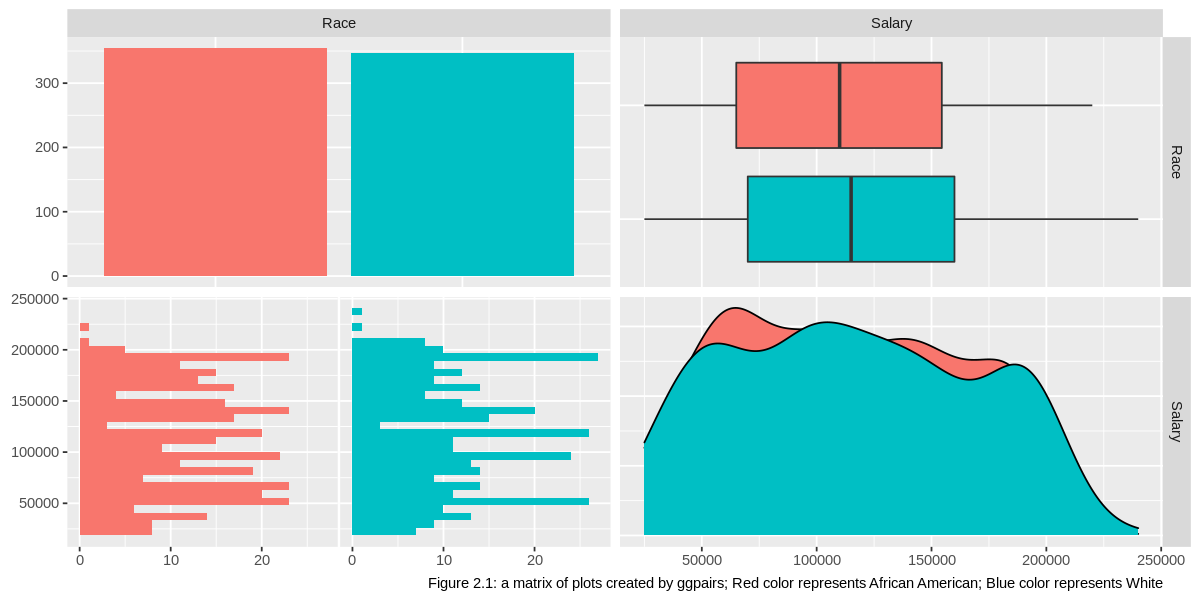

In [155]:
options(repr.plot.width = 10, repr.plot.height = 5) # setting dimensions
# Create a matrix of plots using ggpairs
ggpairs(salary_sample, columns = c("Race", "Salary"), mapping = aes(color = Race)) + 
    labs(caption = "Figure 2.1: a matrix of plots created by ggpairs; Red color represents African American; Blue color represents White")

By Figure 2.1, we can clearly see the distributions of `Salary` for the two `Race` are somewhat different, which already raises enough doubt that race can influence salaries. 

#### Visualizing the salary sample distributions of African American and White Races

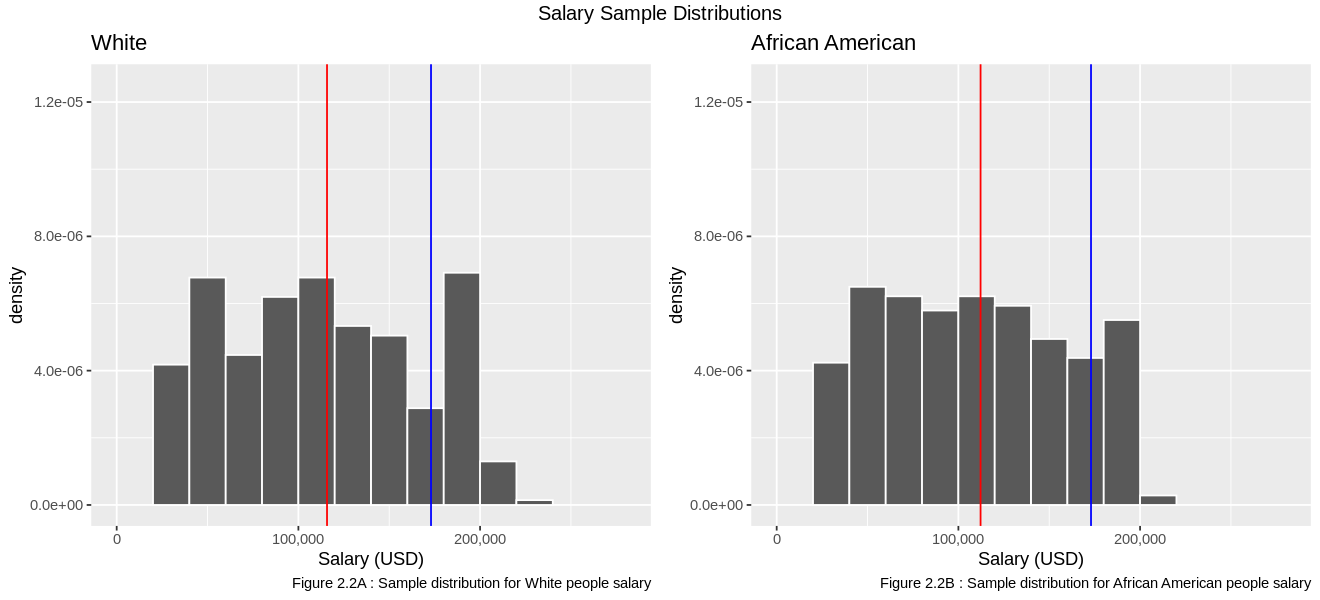

In [156]:
options(repr.plot.width = 11, repr.plot.height = 5) # setting dimensions


white_dist <- salary_race_USA %>% # White sample distribution
    filter(Race == "White") %>%
    ggplot(aes(x = Salary, y = ..density..)) +
    geom_histogram(binwidth = 20000, boundary = 100000 , color = "white") +
    geom_vline(xintercept = mean(white_sample$Salary),
              color = "red") +
    geom_vline(xintercept = top_10percent_avg_salary_USA,
              color = "blue") +
    labs(x = "Salary (USD)", title = "White") +
    scale_x_continuous(labels = comma) + 
    coord_cartesian(xlim = c(0, 280000), ylim = c(0, 1.25e-05)) + # setting to a constant x axis
    labs(caption = "Figure 2.2A : Sample distribution for White people salary")  

african_american_dist <- salary_race_USA %>%  # African American sample distribution
    filter(Race == "African American") %>%
    ggplot(aes(x = Salary, y = ..density..)) +
    geom_histogram(binwidth = 20000, boundary = 100000 , color = "white") +
    geom_vline(xintercept = mean(african_american_sample$Salary),
              color = "red") +
    geom_vline(xintercept = top_10percent_avg_salary_USA,
              color = "blue") +
    labs(x = "Salary (USD)", title = "African American") +
    scale_x_continuous(labels = comma) + 
    coord_cartesian(xlim = c(0, 280000), ylim = c(0, 1.25e-05))+ # setting to a constant x axis
    labs(caption = "Figure 2.2B : Sample distribution for African American people salary")  

grid.arrange(white_dist, african_american_dist, ncol = 2, top = "Salary Sample Distributions")


In Figure 2.2A|B, the red lines represent the average salary, while the blue lines represent the average annual income of the top 10% ($173,000). Both the African American and White distributions are roughly symmetric around their means. However, it is challenging to ascertain differences in means or proportions by solely looking at the histograms. Let's now focus on a more direct comparison of numerical differences.

### Estimates

In [157]:
race_sal_estimates <- salary_sample|>
                        group_by(Race)|>
                        summarize(n = n(),
                                  mean_salary = mean(Salary),
                                  sd_salary = sd(Salary))

race_sal_estimates

Race,n,mean_salary,sd_salary
<chr>,<int>,<dbl>,<dbl>
African American,354,112209.7,50610.19
White,347,115763.8,53376.88


Table ... : ................

In this tibble, we have the columns n, mean_salary, and sd_salary. The **n** colum represents the number of observations we have per race in our sample. The **Mean Salary** column represents the Mean Salary in USD for each race and the **SD Salary** column represents the spread in the salary distribution.

From the point estimates, we can see there is indeed a difference in means of salaries around 3500 USD. The mean salary for White workers is higher than African American workers in USA. 

In [158]:
proportion_estimates <- salary_sample|>
                        filter(!Salary < top_10percent_avg_salary_USA)|>
                        group_by(Race)|>
                        summarize(n=n())|>
                        mutate(prop_in_top10 = c(56/race_sal_estimates$n[1], 68/race_sal_estimates$n[2]))
proportion_estimates

Race,n,prop_in_top10
<chr>,<int>,<dbl>
African American,56,0.1581921
White,68,0.1959654


Table ... : ................

The table shows there is a a difference in proportions of salaries (in USD) that exceed the average top 10% salary around 3.8%. The proportion for White workers is higher than African American workers in USA.

## Methods: Plan

In the preliminary results, we observed differences in both the means of salaries and the proportions of average top 10% salaries between the samples of African American workers and White workers. Unfortunately, point estimates do not provide information about the precision or uncertainty of the estimate, as different samples from the same population can yield varying results due to sampling variability.

To obtain more reliable and robust results, our plan is to analyze the two samples using both Confidence Intervals and Hypothesis Tests.

Since both samples are sufficiently large (n > 30), representative, unbiased, and drawn from two independent populations, any results based on these samples can be generalized to the populations.


**Confidence Intervals:**

We will provide 95% confidence intervals for Salary means and the proportions of the top 10% average Salaries for African American and White individuals (95% confidence level has been chosen as the default option). These intervals will be computed using both bootstrapping and asymptotic methods.

**Hypothesis Tests:**


We will conduct two hypothesis tests at a significance level of 0.1% (α = 0.001) to examine the difference in means of salaries ( $\mu_1$ - $\mu_2$) and proportions of average top 10% salaries ($p_1$ - $p_2$). Here, $\mu_1$ represents the mean salary of all African American workers, $\mu_2$ represents the mean salary of all White workers in the USA, $p_1$ represents the proportion of salaries that exceed the average top 10% salary of all African American workers, and $p_2$ represents the proportion of salaries that exceed the average top 10% salary of all White workers.


We have chosen this low significance level to minimize the chance of a Type I error, which occurs if we reject $H_0$, but $H_0$ is true, ensuring that we only reject the null hypothesis if there is strong evidence.




**Hypotheses for Hypothesis Tests:**

<center> 1. $H_0: \mu_1 - \mu_2 = 0$ vs $H_1: \mu_1 - \mu_2 \neq 0$</center>

Here, $H_0$ suggests no difference in means of salaries (in USD) between individuals of African American and White descent in the USA, while $H_1$ suggests otherwise. Since we have no access to the true standard deviations for both populations, we will employ an simulation (bootstrap) method for the first hypothesis test.


<center> 2. $H_0: p_1 - p_2 = 0$ vs $H_1: p_1 - p_2 \neq 0$</center>

In this case, $H_0$ suggests no difference in proportions of average top 10% salaries (in USD) between individuals of African American and White descent in the USA, while $H_1$ suggests the presence of a difference. Since hypothesis tests for proportion questions do not necessitate the true standard deviations for populations, we will employ an asymptotic method (two-sample z-test)for the second hypothesis test.


**Anticipated Results:**

Based on the preliminary point estimate results, we anticipate rejecting the two null hypotheses ($H_0$) in favor of the alternative hypotheses ($H_1$). This would imply that a significant difference exists in both the means of salaries and the proportions of average top 10% salaries between the two racial groups in the USA.

# Results

## Confidence Intervals 

#### Let's firstly construct 95% confidence intervals for `Salary` means for White and African American people by bootstrapping

In [226]:
# Take 1500 bootstrap samples from white_sample using rep_sample_n with the origial sample size, and calculate the mean of each sample
bootstrap_1500_white_sample_means <- white_sample |>
                                    rep_sample_n(size=nrow(white_sample), reps=1500, replace=T)|>
                                    group_by(replicate)|>
                                    summarize(bootstrap_mean = mean(Salary))

# Calculate 95% confidence interval for bootstrap distribution for means
bootstrap_white_sample_means_ci <- bootstrap_1500_white_sample_means |>
                                    summarize(lower_ci = quantile(bootstrap_mean, 0.025),
                                              upper_ci = quantile(bootstrap_mean, 0.975))

# Calculate standard deviation (standard error) of the bootstrap distribution
bootstrap_white_sample_means_se <- bootstrap_1500_white_sample_means %>%
                                    summarise(se = sd(bootstrap_mean))

# Visualize the 95% confidence interval on the bootstrap distribution
bootstrap_white_means_dist <- bootstrap_1500_white_sample_means|>
    ggplot()+
    geom_histogram(aes(x = bootstrap_mean), binwidth = 1000, boundary = bootstrap_wihte_sample_means_ci[[1]], color ='white') +
    geom_vline(xintercept = bootstrap_wihte_sample_means_ci[[1]], color = "red") +
    geom_vline(xintercept = bootstrap_wihte_sample_means_ci[[2]], color = "red") +
    labs(x = "Salary mean", y = "Count", caption = "...Caption Needed...") +
    ggtitle("Bootstrap Distribution of Salary means for  White people  in USA and 95% CI")


### We will construct rest confidence intervals with the infer workflow, which is eaiser to visualize bootstrapp distributions.

# Take 1500 bootstrap samples from african_american_sample using the infer workflow with the origial sample size, and calculate the mean of each sample
bootstrap_1500_african_american_sample_means <- african_american_sample|>
                                            specify(response = Salary) |>
                                            generate(type = "bootstrap", reps = 1500) %>% 
                                            calculate(stat = "mean")

# Calculate 95% confidence interval for bootstrap distribution for means
bootstrap_african_american_sample_means_ci <- bootstrap_1500_african_american_sample_means |>
                                            get_ci(level = 0.95, type = "percentile")

# Calculate standard deviation (standard error) of the bootstrap distribution
bootstrap_african_american_sample_means_se <- bootstrap_1500_african_american_sample_means %>%
                                        summarise(se = sd(stat))

# Visualize the 95% confidence interval on the bootstrap distribution
bootstrap_african_american_means_dist <- bootstrap_1500_african_american_sample_means|> 
    ggplot() +
    geom_histogram(aes(x = stat), binwidth = 1000, boundary = bootstrap_african_american_sample_means_ci[[1]], color ='white')+
    shade_confidence_interval(endpoints = bootstrap_african_american_sample_means_ci) +
    labs(x = "Salary mean", y = "Count", caption = "...Caption Needed......") +
    ggtitle("Bootstrap Distribution of Salary means for African American people in USA and 95% CI")


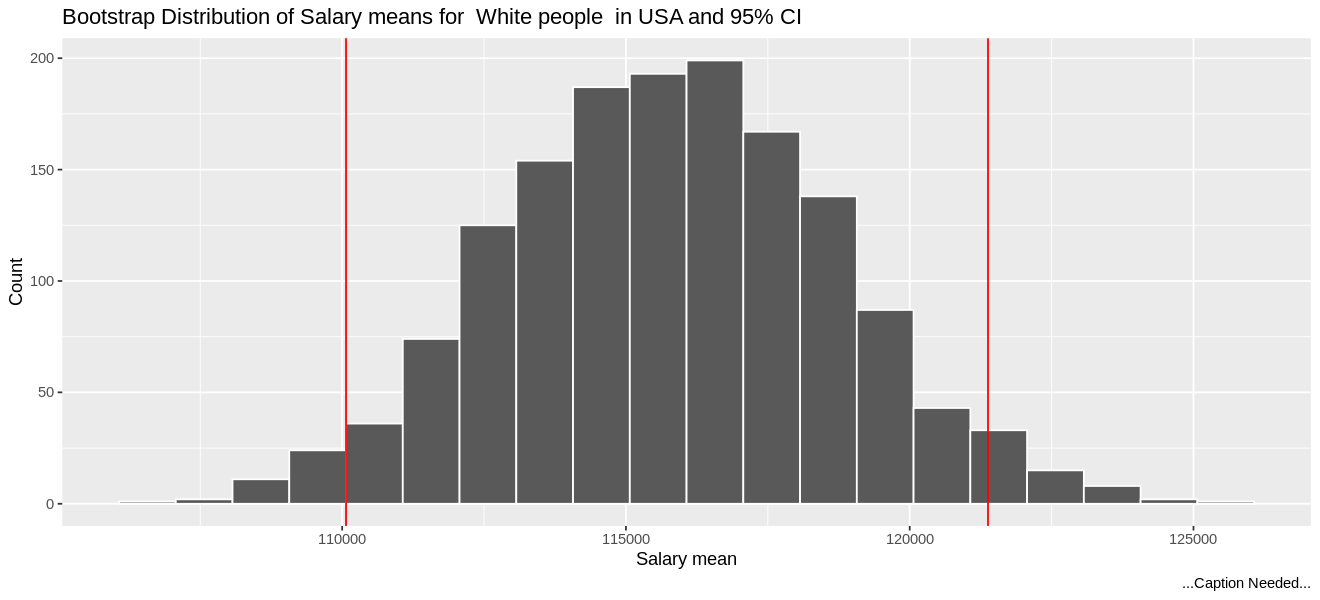

In [223]:
bootstrap_wihte_means_dist

In [192]:
bootstrap_wihte_sample_means_ci

lower_ci,upper_ci
<dbl>,<dbl>
110068.1,121379.3


Table xxx:


In [193]:
bootstrap_wihte_sample_means_se

se
<dbl>
2910.344


Table xxx:

Given Figure xxx and Table xxx1 and xxx2, we are 95% confident that the confidence interval, [110342, 121455.6], captures the value of the true population mean of all White people `Salary` in USA, and the estimate of standard error for the simulated sampling (bootstrap) distribution is 2769.859.

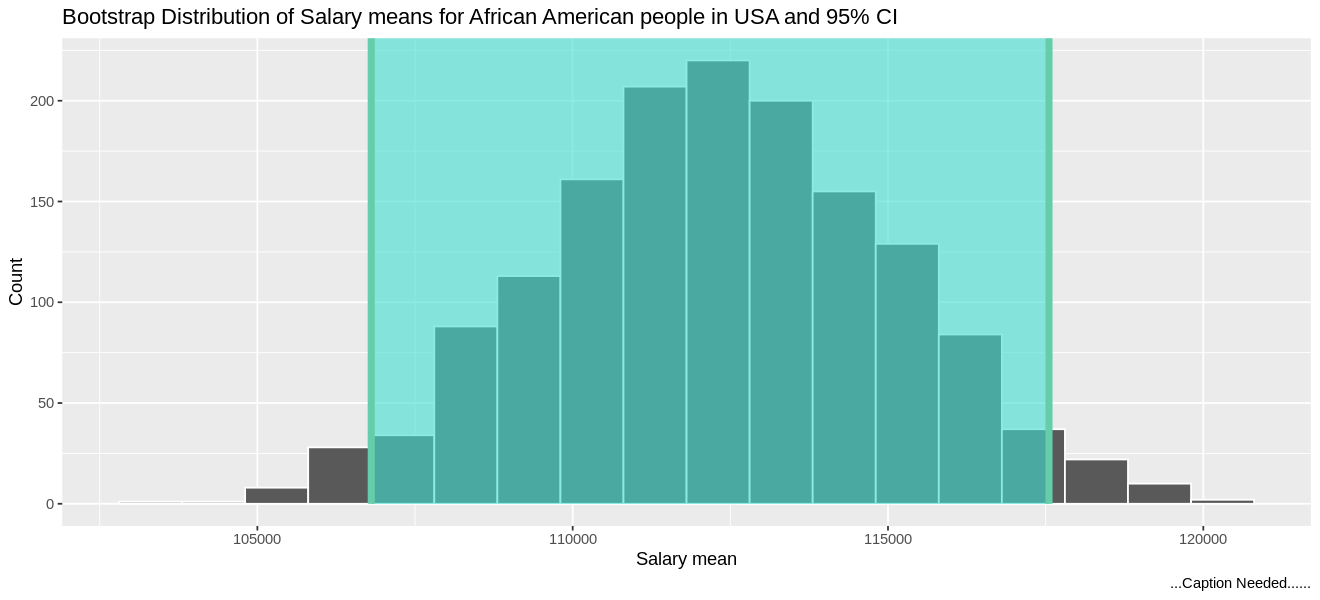

In [194]:
bootstrap_african_american_means_dist

In [195]:
bootstrap_african_american_sample_means_ci

lower_ci,upper_ci
<dbl>,<dbl>
106805.8,117552.9


....


In [196]:
bootstrap_african_american_sample_means_se

se
<dbl>
2745.03


...

Given Figure xxx and Table xxx1 and xxx2, we are 95% confident that the confidence interval, [106910, 117685.5], captures the value of the true population mean of all African American people `Salary` in USA, and the estimate of standard error for the simulated sampling (bootstrap) distribution is 2696.387.

#### Next, let's construct 95% confidence intervals for top 10% `Salary` proportions for White and African American people by bootstrapping

In [224]:
# cancer_ci <- cancer_sample |>
# specify(response = diagnosis, success = "M")|>
# generate(reps = 1000, type = "bootstrap")|>
# calculate(stat = "prop")|>
# get_confidence_interval(level = 0.8, type = "percentile")

white_sample_is_in_top10 <- white_sample|>    #add one column to the original indicating if the obervation is in the top 10 percent
                            mutate(is_in_top10 = (!Salary < top_10percent_avg_salary_USA))|>
                            mutate(is_in_top10 = ifelse(is_in_top10, "1", "0")) # Since success = "String", convert the type of is_in_top10 to String


african_american_sample_is_in_top10 <- african_american_sample |>    #add one column to the original indicating if the obervation is in the top 10 percent
                            mutate(is_in_top10 = (!Salary < top_10percent_avg_salary_USA))|>
                            mutate(is_in_top10 = ifelse(is_in_top10, "1", "0")) # Since success = "String", convert the type of is_in_top10 to String


# Take 1500 bootstrap samples from white_sample using the infer workflow with the origial sample size, and calculate the proportion of each sample
bootstrap_1500_white_sample_props <- white_sample_is_in_top10|>
                                            specify(response = is_in_top10, success = "1") |>
                                            generate(type = "bootstrap", reps = 1500) %>% 
                                            calculate(stat = "prop")


# Calculate 95% confidence interval for bootstrap distribution for means
bootstrap_white_sample_props_ci <- bootstrap_1500_white_sample_props |>
                                            get_ci(level = 0.95, type = "percentile")


# Calculate standard deviation (standard error) of the bootstrap distribution
bootstrap_white_sample_props_se <- bootstrap_1500_white_sample_props %>%
                                        summarise(se = sd(stat))

# Visualize the 95% confidence interval on the bootstrap distribution
bootstrap_white_sample_props_dist <- bootstrap_1500_white_sample_props|> 
    ggplot() +
    geom_histogram(aes(x = stat), binwidth = 0.01, boundary = bootstrap_white_sample_props_ci[[1]], color ='white')+
    shade_confidence_interval(endpoints = bootstrap_white_sample_props_ci) +
    labs(x = "proportion", y = "Count", caption = "...Caption Needed......") +
    ggtitle("Bootstrap Distribution of top 10% avg Salary proportions for White people in USA and 95% CI")


# Take 1500 bootstrap samples from white_sample using the infer workflow with the origial sample size, and calculate the proportion of each sample
bootstrap_1500_african_american_sample_props <- african_american_sample_is_in_top10|>
                                                specify(response = is_in_top10, success = "1") |>
                                                generate(type = "bootstrap", reps = 1500) %>% 
                                                calculate(stat = "prop")


# Calculate 95% confidence interval for bootstrap distribution for means
bootstrap_african_american_sample_props_ci <- bootstrap_1500_african_american_sample_props |>
                                            get_ci(level = 0.95, type = "percentile")



# Calculate standard deviation (standard error) of the bootstrap distribution
bootstrap_african_american_sample_props_se <- bootstrap_1500_african_america_sample_props %>%
                                        summarise(se = sd(stat))


# Visualize the 95% confidence interval on the bootstrap distribution
bootstrap_african_american_sample_props_dist <- bootstrap_1500_african_america_sample_props|> 
    ggplot() +
    geom_histogram(aes(x = stat), binwidth = 0.01, boundary = bootstrap_african_america_sample_props_ci[[1]], color ='white')+
    shade_confidence_interval(endpoints = bootstrap_african_america_sample_props_ci) +
    labs(x = "proportion", y = "Count", caption = "...Caption Needed......") +
    ggtitle("Bootstrap Distribution of top 10% avg Salary proportions for African America people in USA and 95% CI")



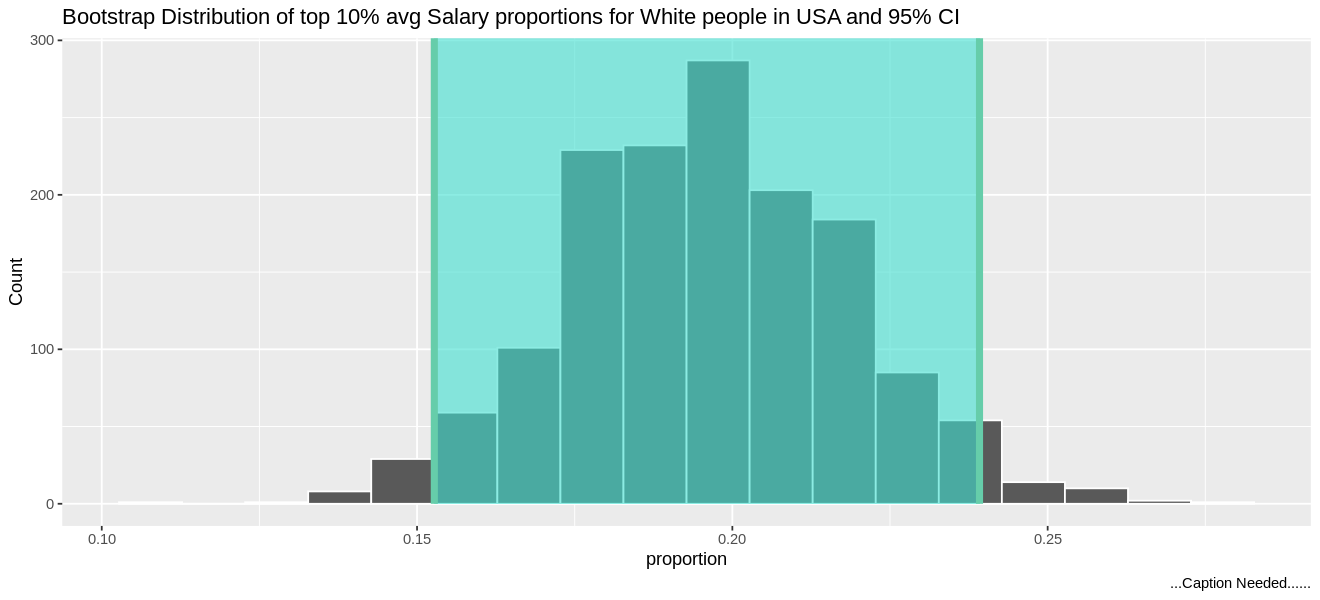

In [225]:
bootstrap_white_sample_props_dist

In [168]:
bootstrap_white_sample_props_ci

lower_ci,upper_ci
<dbl>,<dbl>
0.1541066,0.2391931


In [169]:
bootstrap_white_sample_props_se

se
<dbl>
0.02180942


Given Figure xxx and Table xxx1 and xxx2, we are 95% confident that the confidence interval, [0.1527378, 0.2363112], captures the value of the true population proportion of top 10% average salary for all White people in USA, and the estimate of standard error for the simulated sampling (bootstrap) distribution is about 0.0216.

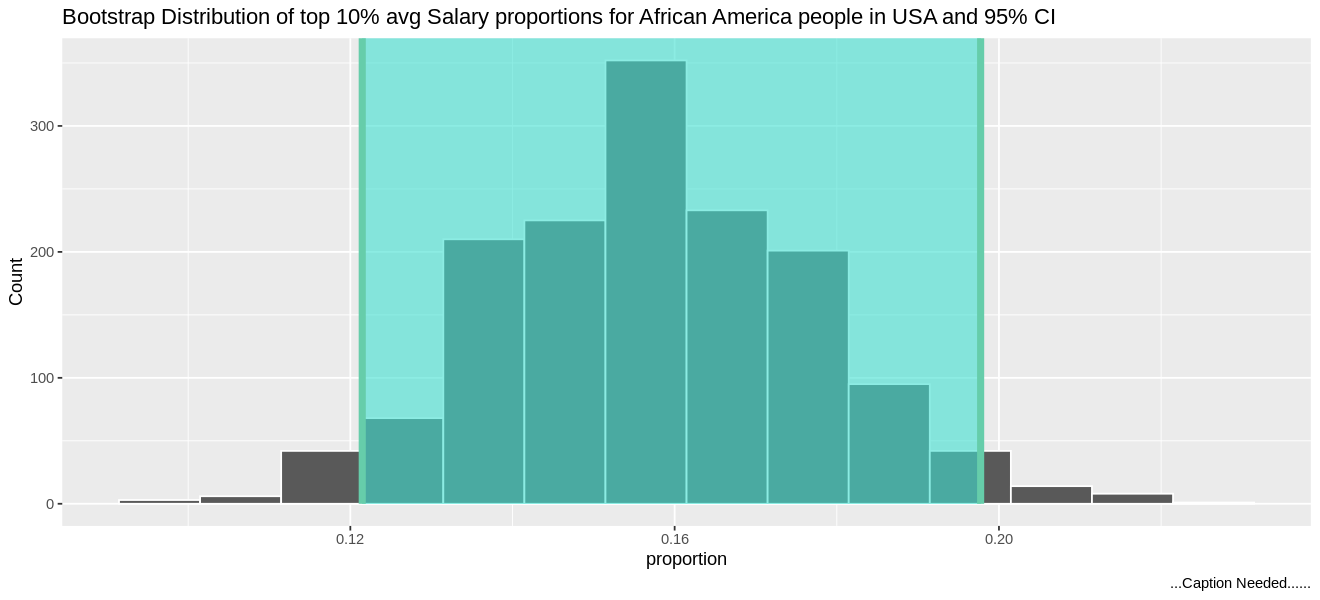

In [170]:
bootstrap_african_american_sample_props_dist

In [171]:
bootstrap_african_american_sample_props_ci

lower_ci,upper_ci
<dbl>,<dbl>
0.1214689,0.1977401


In [172]:
bootstrap_african_american_sample_props_se

se
<dbl>
0.01939326


Given Figure xxx and Table xxx1 and xxx2, we are 95% confident that the confidence interval, [0.1214689, 0.1977401], captures the value of the true population proportion of top 10% average salary for all African American people in USA, and the estimate of standard error for the simulated sampling (bootstrap) distribution is about 0.0194.

#### Now, let's employ asymptotic methods to construct the four CIs and assess whether the results differ

In [207]:
### Two CIs for means

# Obtain the sample mean(Replace Mu with X_bar)
white_sample_mean <- mean(white_sample$Salary)

# Obtain the sample standard deviation(Replace Sigma with S)
white_sample_sd <- sd(white_sample$Salary)

# Obtain the sample size
white_sample_size <- length(white_sample$Salary)

# Obtain the std error estimate
white_sample_mean_std_error <- white_sample_sd/sqrt(white_sample_size)

# Calculate the CI
white_means_ci <- tibble(
            lower_ci = qnorm(0.025, white_sample_mean,  white_sample_mean_std_error),
            upper_ci = qnorm(0.975, white_sample_mean,  white_sample_mean_std_error))



# Obtain the sample mean(Replace Mu with X_bar)
african_american_sample_mean <- mean(african_american_sample$Salary)

# Obtain the sample standard deviation(Replace Sigma with S)
african_american_sample_sd <- sd(african_american_sample$Salary)

# Obtain the sample size
african_american_sample_size <- length(african_american_sample$Salary)

# Obtain the std error estimate
african_american_sample_mean_std_error <- african_american_sample_sd/sqrt(african_american_sample_size)

# Calculate the CI
african_american_means_ci <- tibble(
            lower_ci = qnorm(0.025, african_american_sample_mean,  african_american_sample_mean_std_error),
            upper_ci = qnorm(0.975, african_american_sample_mean,  african_american_sample_mean_std_error))


### Two CIs for props

# Obtain the sample proportion(Replace P with P_hat)
white_sample_p_hat <- mean(white_sample_is_in_top10$is_in_top10 == '1')

# Obtain the sample size
white_sample_prop_size <- length(white_sample_is_in_top10$is_in_top10)

# Obtain the std error estimate
white_sample_prop_std_error <- sqrt(white_sample_p_hat*(1-white_sample_p_hat)/white_sample_prop_size)

# Calculate the CI
white_props_ci <- tibble(
            lower_ci = qnorm(0.025, white_sample_p_hat,  white_sample_prop_std_error),
            upper_ci = qnorm(0.975, white_sample_p_hat,  white_sample_prop_std_error))

# Obtain the sample proportion(Replace P with P_hat)
african_american_sample_p_hat <- mean(african_american_sample_is_in_top10$is_in_top10 == '1')

# Obtain the sample size
african_american_sample_prop_size <- length(african_american_sample_is_in_top10$is_in_top10)

# Obtain the std error estimate
african_american_sample_prop_std_error <- sqrt(african_american_sample_p_hat*(1-african_american_sample_p_hat)/african_american_sample_prop_size)

# Calculate the CI
african_american_props_ci <- tibble(
            lower_ci = qnorm(0.025, african_american_sample_p_hat,  african_american_sample_prop_std_error),
            upper_ci = qnorm(0.975, african_american_sample_p_hat,  african_american_sample_prop_std_error))



In [208]:
white_means_ci

lower_ci,upper_ci
<dbl>,<dbl>
110147.7,121379.9


In [209]:
african_american_means_ci

lower_ci,upper_ci
<dbl>,<dbl>
106937.5,117481.8


In [176]:
white_props_ci

lower_ci,upper_ci
<dbl>,<dbl>
0.1542006,0.2377302


In [177]:
african_american_props_ci

lower_ci,upper_ci
<dbl>,<dbl>
0.1201779,0.1962062


Comparing Table ....1 with Table ....2, Table ....3 with Table ....4, Table ....5 with Table .....6, and Table .....7 with Table ......8, it is evident that the results obtained using both bootstrapping and asymptotic methods are remarkably similar. The most substantial disparity arises when comparing 'bootstrap_african_american_sample_means_ci' [106805.8, 117552.9] with 'african_american_means_ci' [106937.5, 117481.8]. Nevertheless, differences of around a hundred or so are quite trivial when dealing with numbers in the hundreds of thousands. Additionally, the proportion differences are equally negligible, with none exceeding 0.002. Consequently, we conclude that both bootstrapping and asymptotic methods are suitable for analyzing our samples.

The bootstrapping method is widely applicable, while the asymptotic method is appropriate when there is no significant violation of the Central Limit Theorem (CLT). In our scenario, both of our sample sizes meet the condition of n > 30, as well as the requirements of $n p_0 \geq 10$ and $n(1-p_0)\geq 10$. Moreover, the samples were independently drawn, and the estimator relies on a sum of random components. These factors contribute to the trustworthiness of both bootstrapping and asymptotic methods.

## Hypothesis Test
#### Let's now shift our focus to the Hypothesis Tests


In the preceding project parts, we have demonstrated the substantial similarity between the results generated by bootstrapping and asymptotic methods. For the subsequent hypothesis tests, we will employ a single method for each, avoiding unnecessary code duplication.

### Hypothesis Test 1: $H_0: \mu_1 - \mu_2 = 0$ vs $H_1: \mu_1 - \mu_2 \neq 0$</center> at (α = 0.001)
where $\mu_1$ represents the mean salary of all African American workers, and $\mu_2$ represents the mean salary of all White workers in the USA.

In [199]:
# Employ a simulation (bootstrap) method for Hypothesis Test 1

# Create the null model with infer workflow
null_dist <- salary_sample %>% 
        specify(formula = Salary ~ Race) %>%
        hypothesize(null = "independence") %>%
        generate(reps = 1000, type = "permute") %>%
        calculate(stat = "diff in means", order = c("African American", "White"))

# Obtain the observed difference in means
obs_diff_means <- salary_sample %>% 
  specify(formula = Salary ~ Race) %>% 
  calculate(stat = "diff in means", order = c("African American", "White"))

# Obtain p-value
p_val <- null_dist %>% 
          get_p_value(obs_stat = obs_diff_means, direction = "both")

# Visualize the null model, p-value, and observed statistic
p_val_dist <- visualize(null_dist, bins = 10) + 
              shade_p_value(obs_stat = obs_diff_means, direction = "both")



In [200]:
obs_diff_means

stat
<dbl>
-3554.134


In [201]:
p_val <- null_dist %>% 
          get_p_value(obs_stat = obs_diff_means, direction = "both")
p_val

p_value
<dbl>
0.362


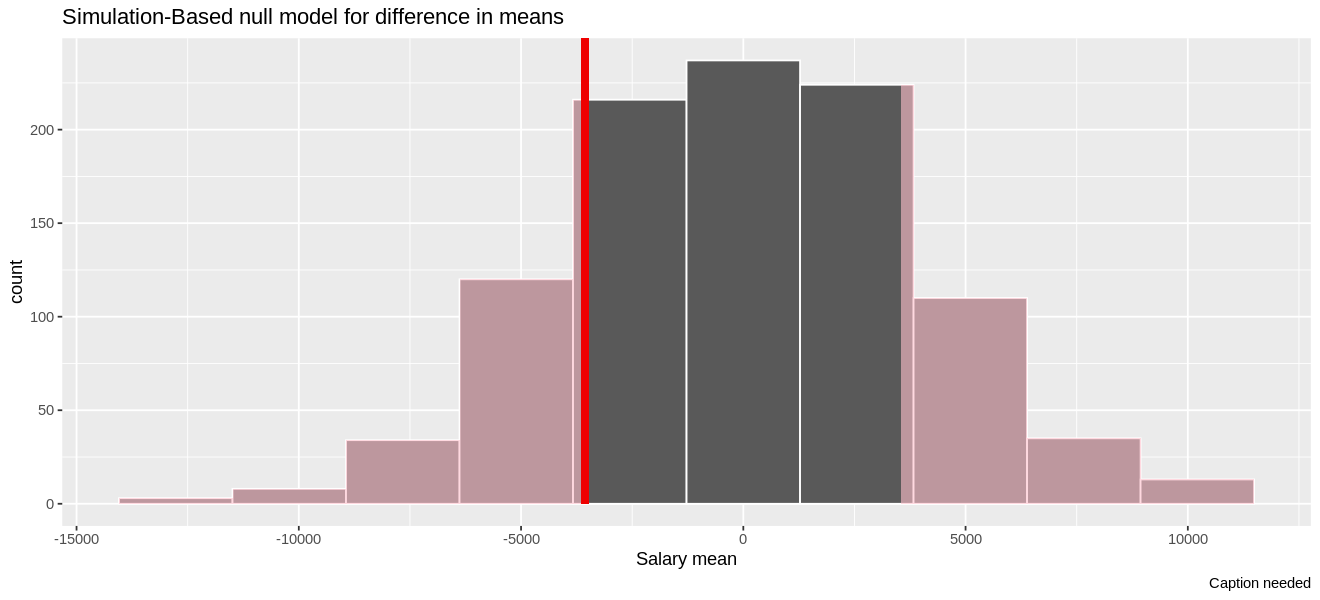

In [206]:
p_val_dist <- visualize(null_dist, bins = 10) + 
               shade_p_value(obs_stat = obs_diff_means, direction = "both")+
               labs(x="Salary mean", caption=" Caption needed", title = "Simulation-Based null model for difference in means") 

p_val_dist

Since the p-value is much larger than our specified significance level of 0.001, we fail to reject our null hypothesis that $H_0: \mu_1 - \mu_2 = 0$. We do not have the evidence needed in this sample of data to suggest that there is no difference in salary between White and African American Races in America. Furthermore, we cannot say that a difference exists in salary between White and African American races, on average, for all people in the US.

### Hypothesis Test 2: $H_0: p_1 - p_2 = 0$ vs $H_1: p_1 - p_2 \neq 0$</center> at (α = 0.001)
where, $p_1$ represents the proportion of salaries that exceed the average top 10% salary of all African American workers, and $p_2$ represents the proportion of salaries that exceed the average top 10% salary of all White workers.

In [198]:
# Employ an asymptotic (Two-sample z-test) method for Hypothesis Test 2

# Retrieve the proportion table
proportion_estimates

Race,n,prop_in_top10
<chr>,<int>,<dbl>
African American,56,0.1581921
White,68,0.1959654


In [211]:
# Obtain p_hat_1 and p_hat_2 
p_hat_1 <- proportion_estimates$prop_in_top10[1]
p_hat_2 <- proportion_estimates$prop_in_top10[2]

# Obtain n_1 and n_2 
n_1 <- proportion_estimates$n[1]
n_2 <- proportion_estimates$n[2]

# Calculate the p_pooled
p_pooled <- (n_1 * p_hat_1 + n_2 * p_hat_2)/(n_1 + n_2)

# Calculate the observed_test_statistic
obs_test_statistic <- (p_hat_1 - p_hat_2) / (sqrt(p_pooled * (1 - p_pooled)*(1/n_1 + 1/n_2)))


# Calculate the p_value 
p_value <- 2 * pnorm(obs_test_statistic)  # Multiplied by 2 because it is two tailed test; lower.tail = T because of the negative obs_test_statistic

[1] 0.5849615

In [212]:
obs_test_statistic

[1] -0.546152

In [213]:
p_value

[1] 0.5849615

In [ ]:
# Let's check if the p_value generated by asymptotic method is accurate

prop_summary<- tidy(
        prop.test(x = c(n_1 * p_hat_1, n_2 * p_hat_2),
                  n = c(n_1, n_2),
                  correct = FALSE))

prop_summary

estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.1581921,0.1959654,0.298282,0.5849615,1,-0.1720715,0.09652484,2-sample test for equality of proportions without continuity correction,two.sided


Nice! The p-value from Table xxx matches the p_value generated by asymptotic method, which indicates that the asymptotic method we applied is trustworthy. 

Since the p-value is much larger than our specified significance level of 0.001, we fail to reject our null hypothesis that $H_0: p_1 - p_2 = 0$.

## Discussion

Summarize what you found, and the implications/impact of your findings.

If relevant, discuss whether your results were what you expected to find.

Discuss future questions/research this study could lead to.

## References

Kochhar.R & Cilluffo.A, 2018. Income Inequality in the U.S is rising most rapidly among Asians\
https://www.pewresearch.org/social-trends/2018/07/12/income-inequality-in-the-u-s-is-rising-most-rapidly-among-asians/ \
Legate-Wolfe.A,2023. Kochhar.R & Cilluffo.A, 2018. Income Inequality in the U.S is rising most rapidly among Asians
https://www.pewresearch.org/social-trends/2018/07/12/income-inequality-in-the-u-s-is-rising-most-rapidly-among-asians/
Legate-Wolfe.A,2023. How much do I need to make to be in the top 1%, 5%, and 10% in the US? It's probably less than you think https://finance.yahoo.com/news/much-money-top-1-5-100000529.html?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAAGZBEXN1TT-flYembR2n7lJg7hYbx0lznAeQYejaRI_trs4J9huxmVAhmb6CyZTO9yTNE1VFvLYPJh6BBKLH_EKO0k9GHE3D8YXBhH6tEW9LCNUmctadMk8AiFU9BgWXcaV1Y8219Ix_ouKofgWOUFHKWfaCPxT9P1bEeu87HTiD NPR.(2016) Forgotten History: How the New England Colonists Embraced the Slave Trade
https://www.npr.org/2016/06/21/482874478/forgotten-history-how-the-new-england-colonists-embraced-the-slave-trade
Williams.W,2021. Wage gaps by race.
https://www.investopedia.com/wage-gaps-by-race-5073258#citation-31
Sudheer.P, 2023. Salary dataset based on country and race
https://www.kaggle.com/datasets/sudheerp2147234/salary-dataset-based-on-country-and-raceHow much do I need to make to be in the top 1%, 5%, and 10% in the US? It's probably less than you think
https://finance.yahoo.com/news/much-money-top-1-5-100000529.html?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAAGZBEXN1TT-flYembR2n7lJg7hYbx0lznAeQYejaRI_trs4J9huxmVAhmb6CyZTO9yTNE1VFvLYPJh6BBKLH_EKO0k9GHE3D8YXBhH6tEW9LCNUmctadMk8AiFU9BgWXcaV1Y8219Ix_ouKofgWOUFHKWfaCPxT9P1bEeu87HTiD
NPR.(2016) Forgotten History: How the New England Colonists Embraced the Slave Trade\
https://www.npr.org/2016/06/21/482874478/forgotten-history-how-the-new-england-colonists-embraced-the-slave-trade \
Williams.W,2021. Wage gaps by race.\
https://www.investopedia.com/wage-gaps-by-race-5073258#citation-31 \
Sudheer.P, 2023. Salary dataset based on country and race \
https://www.kaggle.com/datasets/sudheerp2147234/salary-dataset-based-on-country-and-race